In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
file_path = "experiment_results_outguess.csv"
data = pd.read_csv(file_path)
data = data[~data['Image'].str.contains('Error')]

# Filtering the data so we only use the bike images
data = data[data['Image'].str.contains('bike')]

# Display basic information about the DataFrame
print("Basic Information:")
print(data.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

# Display the first few rows of the DataFrame
print("\nFirst Few Rows:")
print(data.head())

# Analyze specific columns
print("\nData Size (bytes) Statistics:")
print("Mean:", data['Data Size (bytes)'].mean())
print("Median:", data['Data Size (bytes)'].median())
print("Maximum:", data['Data Size (bytes)'].max())
print("Minimum:", data['Data Size (bytes)'].min())

print("\nPSNR Statistics:")
print("Mean:", data['PSNR'].mean())
print("Median:", data['PSNR'].median())
print("Maximum:", data['PSNR'].max())
print("Minimum:", data['PSNR'].min())

print("\nSSIM Statistics:")
print("Mean:", data['SSIM'].mean())
print("Median:", data['SSIM'].median())
print("Maximum:", data['SSIM'].max())
print("Minimum:", data['SSIM'].min())

# Analyze categorical columns
print("\nData Integrity Counts:")
print(data['Data Integrity'].value_counts())

print("\nImages Match Counts:")
print(data['Images Match'].value_counts())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 4912 to 6371
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Image              816 non-null    object 
 1   Image_size         816 non-null    int64  
 2   Data Size (bytes)  816 non-null    int64  
 3   Ratio              816 non-null    int64  
 4   PSNR               816 non-null    float64
 5   SSIM               816 non-null    float64
 6   Data Integrity     816 non-null    bool   
 7   Images Match       816 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(1)
memory usage: 46.2+ KB
None

Summary Statistics for Numerical Columns:
          Image_size  Data Size (bytes)       Ratio        PSNR        SSIM
count     816.000000         816.000000  816.000000  816.000000  816.000000
mean   282006.267157        6818.335784    2.405637   47.914640    0.996651
std     54841.282182        3571.390435    1.13760

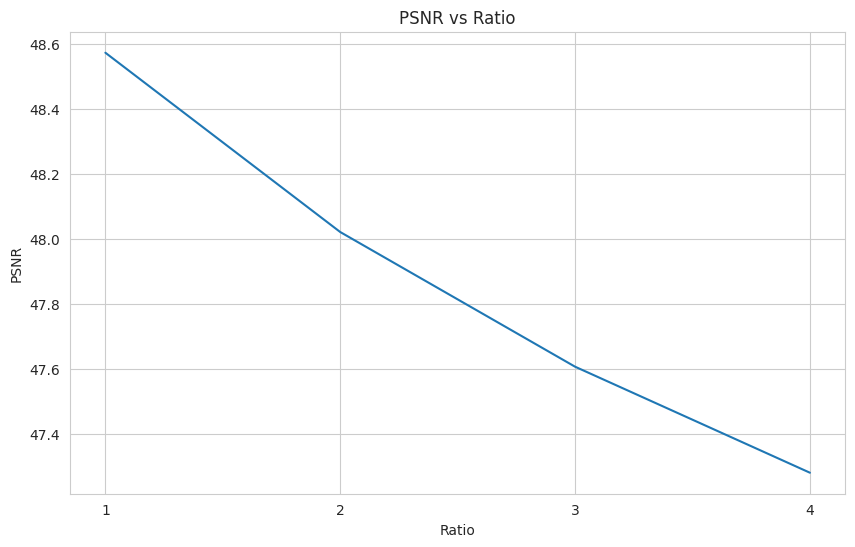

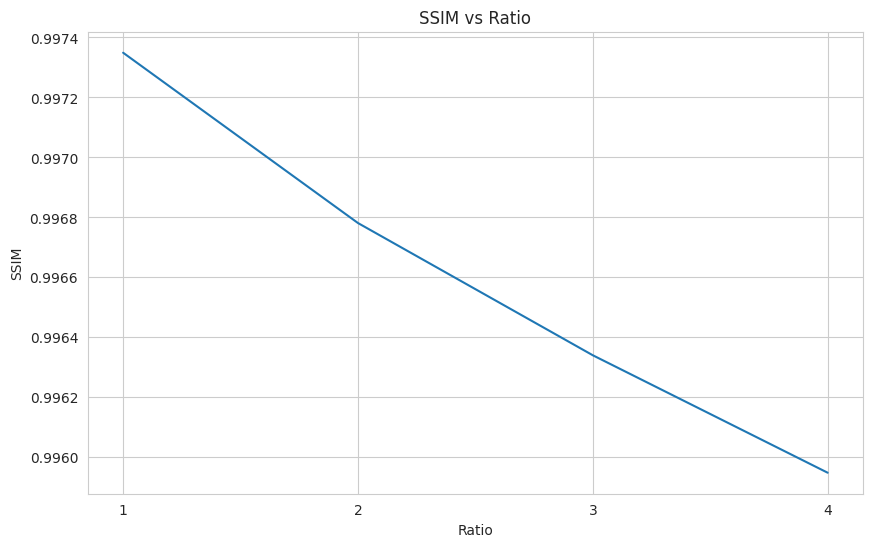

PSNR Summary Statistics:
       count       mean       std        min        25%        50%        75%  \
Ratio                                                                           
1      239.0  48.573371  2.130896  42.151763  47.257192  48.965739  50.057449   
2      197.0  48.021930  1.962990  42.021496  46.886594  48.453490  49.355637   
3      190.0  47.607740  1.812032  41.914823  46.580363  48.053668  48.854882   
4      190.0  47.281685  1.712896  41.809677  46.327811  47.717079  48.448398   

             max  
Ratio             
1      52.955600  
2      51.971757  
3      51.175879  
4      50.606368  

SSIM Summary Statistics:
       count      mean       std       min       25%       50%       75%  \
Ratio                                                                      
1      239.0  0.997349  0.001229  0.991551  0.996839  0.997719  0.998166   
2      197.0  0.996781  0.001405  0.990589  0.996284  0.997229  0.997682   
3      190.0  0.996340  0.001556  0.989747  

In [4]:
# Set the style of seaborn
sns.set_style("whitegrid")

df = data

# Plot PSNR against different ratios
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Ratio', y='PSNR', errorbar=None)
plt.title('PSNR vs Ratio')
plt.xlabel('Ratio')
plt.ylabel('PSNR')
plt.xticks(df['Ratio'].unique())  # Ensure all ratios are shown on the x-axis
plt.grid(True)
plt.show()

# Plot SSIM against different ratios
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Ratio', y='SSIM', errorbar=None)
plt.title('SSIM vs Ratio')
plt.xlabel('Ratio')
plt.ylabel('SSIM')
plt.xticks(df['Ratio'].unique())  # Ensure all ratios are shown on the x-axis
plt.grid(True)
plt.show()

# Calculate summary statistics
psnr_summary = df.groupby('Ratio')['PSNR'].describe()
ssim_summary = df.groupby('Ratio')['SSIM'].describe()

print("PSNR Summary Statistics:")
print(psnr_summary)
print("\nSSIM Summary Statistics:")
print(ssim_summary)


In [5]:
from scipy.stats import f_oneway


# Conducting statistical test ANOVA to determine if there are significant differences in PSNR and SSIM across different ratios.


# Perform ANOVA for PSNR and SSIM across different ratios
anova_psnr = f_oneway(*[group['PSNR'] for name, group in df.groupby('Ratio')])
anova_ssim = f_oneway(*[group['SSIM'] for name, group in df.groupby('Ratio')])

print("ANOVA results for PSNR:")
print("F-statistic:", anova_psnr.statistic)
print("p-value:", anova_psnr.pvalue)

print("\nANOVA results for SSIM:")
print("F-statistic:", anova_ssim.statistic)
print("p-value:", anova_ssim.pvalue)


ANOVA results for PSNR:
F-statistic: 17.977499755485375
p-value: 2.6506428926021558e-11

ANOVA results for SSIM:
F-statistic: 36.16105316523682
p-value: 6.110065475236656e-22
